In [10]:
import yfinance as yf
import pandas as pd

data = yf.download("AAPL", start="2015-01-01", end="2025-01-01")
data

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
2015-01-05,23.635284,24.169164,23.448427,24.089082,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968962,24.069063,23.735389,23.846614,160423600
2015-01-08,24.889904,24.947741,24.180289,24.298189,237458000
...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


In [11]:
data = data[['Close']]
data.rename(columns={'Close': 'price'}, inplace=True)

data['Return'] = data['price'].pct_change().dropna()

C:\Users\ROG\AppData\Local\Temp\ipykernel_2816\150717788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Close': 'price'}, inplace=True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_2816\150717788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['price'].pct_change().dropna()


In [12]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

data['Volatility'] = data['Return'].rolling(window=5).std()
data.dropna(inplace=True)

features = data[['Return', 'Volatility']].values

model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, random_state=42)
model.fit(features)

hidden_states = model.predict(features)
data['Regime'] = hidden_states

C:\Users\ROG\AppData\Local\Temp\ipykernel_2816\2242996548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Volatility'] = data['Return'].rolling(window=5).std()
C:\Users\ROG\AppData\Local\Temp\ipykernel_2816\2242996548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Model is not converging.  Current: 16115.828518954728 is not greater than 16115.88376320722. Delta is -0.055244252493139356
C:\Users\ROG\AppData\Local\Temp\ipykernel_2816\2242996548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hidden_states


In [13]:
mean_returns = data.groupby('Regime')['Return'].mean().sort_values()
regime_map = {mean_returns.index[0]: 'Bearish', mean_returns.index[1]: 'Neutral', mean_returns.index[2]: 'Bullish'}
data['Market Regime'] = data['Regime'].map(regime_map)

C:\Users\ROG\AppData\Local\Temp\ipykernel_2816\2482725731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Regime'] = data['Regime'].map(regime_map)


In [14]:
# regime_means = pd.DataFrame({
#     'Regime': range(model.n_components),
#     'Mean Return': [features[data['Regime']==i][:,0].mean() for i in range(model.n_components)]
# }).sort_values(by='Mean Return')

# regime_order = regime_means["Regime"].tolist()
# regime_labels = {
#     regime_order[0]: "Bearish",
#     regime_order[1]: "Neutral",
#     regime_order[2]: "Bullish"
# }

# data["Market Regime"] = data["Regime"].map(regime_labels)

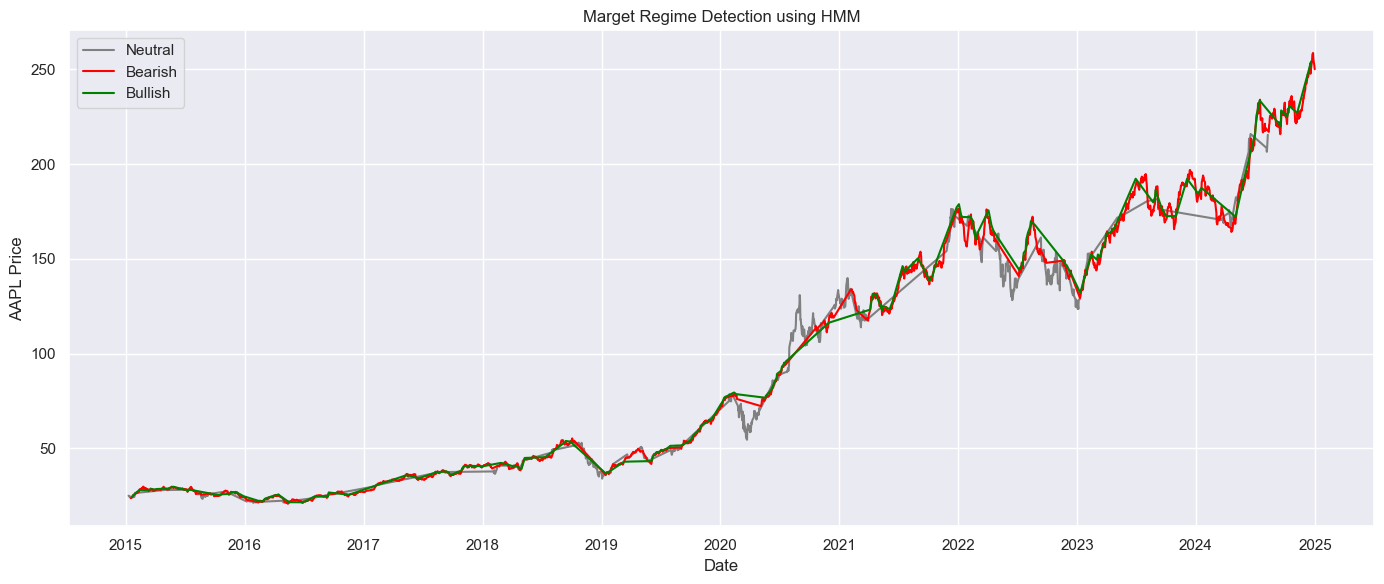

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

plt.figure(figsize=(14, 6))
colors = {'Bullish': 'green', 'Neutral': 'gray', 'Bearish': 'red'}

for regime in data["Market Regime"].unique():
    state_data = data[data["Market Regime"] == regime]
    plt.plot(state_data.index, state_data["price"], label=regime, color=colors[regime])

plt.legend()
plt.title("Marget Regime Detection using HMM")
plt.xlabel("Date")
plt.ylabel("AAPL Price")
plt.tight_layout()
plt.show()

In [16]:

data

Price,price,Return,Volatility,Regime,Market Regime
Ticker,AAPL,,,,
Date,,,,,
2015-01-09,24.916601,0.001073,0.024178,2,Neutral
2015-01-12,24.302635,-0.024641,0.022986,2,Neutral
2015-01-13,24.518415,0.008879,0.022776,2,Neutral
2015-01-14,24.424986,-0.003811,0.022905,2,Neutral
2015-01-15,23.762083,-0.027140,0.015982,2,Neutral
...,...,...,...,...,...
2024-12-24,257.916443,0.011478,0.015260,1,Bearish
2024-12-26,258.735504,0.003176,0.006617,1,Bearish


In [17]:
data.to_csv('./data/hmm_regime.csv', index=True)